In [30]:
#Twitter APIs have a fetch limit, so do your trial iterations with a small number of tweets like around 100-200 so that you don't exhaust that limit. Can use much larger number while presenting it to the teacher
#Keyword that you use for the search should be a single word

In [31]:
!pip install emoji

In [32]:
#Importing of libraries

import tweepy 
from textblob import TextBlob
import pandas as pd
import re
# import numpy as np
import emoji
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
import json
from itertools import cycle, islice
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
def initiate_api():
    try:
        with open('/content/my_credentials.json', 'r') as f:
            my_credentias = json.load(f)
        auth = tweepy.OAuthHandler(
            my_credentias["CONSUMER_KEY"], my_credentias["CONSUMER_SECRET"])
        auth.set_access_token(
            my_credentias["ACCESS_KEY"], my_credentias["ACCESS_SECRET"])
        api = tweepy.API(auth, wait_on_rate_limit=True)
        return api
    except:
        print("Error due to my_credentias.json")
        return None

In [34]:
api=initiate_api()

In [35]:
n=int(input("number of tweets "))
search_w = str(input("enter a keyword as in for a tweet: "))
search_word = search_w + " -filter:links AND -filter:retweets AND -filter:replies" 

number of tweets 500
enter a keyword as in for a tweet: family


In [36]:
tweets = tweepy.Cursor(api.search, q=search_word, lang="en", tweet_mode='extended', include_rts=False).items(n)

In [37]:
#Creating a dataframe with a column called Tweets  
df=pd.DataFrame([tweet.full_text for tweet in tweets],columns=['Tweets'])

In [38]:
df

,Tweets
0,current mood: those family
1,this would be the perfect space to raise a family
2,sometimes I wonder what caused and triggered m...
3,"""Wicked Tuna"" captain Tyler McLaughlin's Wiki:..."
4,All that sea swimming and squinting in the sun...
...,...
495,thinking about that time i served a large rude...
496,Rest in peace Ricky Rick ❤️ I don’t want to be...
497,As Salaam Alakium Family‼️‼️ Happy Saviours Da...
498,I hope this isn’t real but I also hope it’s no...


In [39]:
#Cleaning the Tweets
def cleanTxt(text):
    text=re.sub('@[A-Za-z0-9]+','',text)          # Removed @...
    text=re.sub(r'#','',text)                     # Removed #
    text=re.sub(emoji.get_emoji_regexp()," ",text)# Removed emojis
    return text

In [40]:
df['Tweets']=df['Tweets'].apply(cleanTxt)
df 

,Tweets
0,current mood: those family
1,this would be the perfect space to raise a family
2,sometimes I wonder what caused and triggered m...
3,"""Wicked Tuna"" captain Tyler McLaughlin's Wiki:..."
4,All that sea swimming and squinting in the sun...
...,...
495,thinking about that time i served a large rude...
496,Rest in peace Ricky Rick I don’t want to bel...
497,As Salaam Alakium Family Happy Saviours Day ...
498,I hope this isn’t real but I also hope it’s no...


In [41]:
df["new_tweets"]=df["Tweets"]
df['new_tweets']=df['new_tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['new_tweets']=df['new_tweets'].str.replace('[^\w\s]','',regex=True)
stop=stopwords.words('english')
df["new_tweets"]=df["new_tweets"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.pop('Tweets')
df

,new_tweets
0,current mood family
1,would perfect space raise family
2,sometimes wonder caused triggered hate doubt f...
3,wicked tuna captain tyler mclaughlins wiki net...
4,sea swimming squinting sun nothing seeing wife...
...,...
495,thinking time served large rude family dinner ...
496,rest peace ricky rick dont want believe youre ...
497,salaam alakium family happy saviours day excited
498,hope isnt real also hope like marketing gimmic...


In [42]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemm(text):
  word_list=nltk.word_tokenize(text)
  lemm_output=' '.join([lemmatizer.lemmatize(w) for w in word_list])
  return lemm_output

df['new_tweets']=df['new_tweets'].apply(lemm, convert_dtype=True, args=())
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,new_tweets
0,current mood family
1,would perfect space raise family
2,sometimes wonder caused triggered hate doubt f...
3,wicked tuna captain tyler mclaughlins wiki net...
4,sea swimming squinting sun nothing seeing wife...
...,...
495,thinking time served large rude family dinner ...
496,rest peace ricky rick dont want believe youre ...
497,salaam alakium family happy saviour day excited
498,hope isnt real also hope like marketing gimmic...


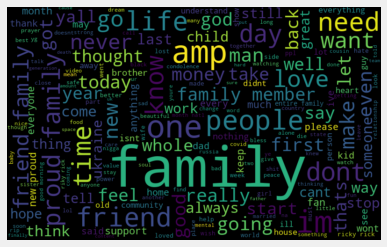

In [45]:
#Plotting our Wordcloud
allWords = ' '.join( [twts for twts in df['new_tweets']])
wordCloud = WordCloud(width=800 , height=500 , random_state=21 ,max_font_size=119).generate(allWords)
plt.imshow(wordCloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [43]:
#subjectivity
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#function of polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

In [44]:
#new column
df['Subjectivity'] = df['new_tweets'].apply(getsubjectivity)
df['Polarity'] = df['new_tweets'].apply(getpolarity)

#dataframe with columns 
df

,new_tweets,Subjectivity,Polarity
0,current mood family,0.400000,0.000000
1,would perfect space raise family,1.000000,1.000000
2,sometimes wonder caused triggered hate doubt f...,0.650000,-0.425000
3,wicked tuna captain tyler mclaughlins wiki net...,0.050000,0.150000
4,sea swimming squinting sun nothing seeing wife...,0.400000,0.200000
...,...,...,...
495,thinking time served large rude family dinner ...,0.546429,-0.047619
496,rest peace ricky rick dont want believe youre ...,0.100000,0.000000
497,salaam alakium family happy saviour day excited,0.875000,0.587500
498,hope isnt real also hope like marketing gimmic...,0.250000,0.200000


In [46]:
#negative neutral and postive analysis
def getanalysis(score):
  if score < 0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getanalysis)

#dataframe
df


,new_tweets,Subjectivity,Polarity,Analysis
0,current mood family,0.400000,0.000000,Neutral
1,would perfect space raise family,1.000000,1.000000,Positive
2,sometimes wonder caused triggered hate doubt f...,0.650000,-0.425000,Negative
3,wicked tuna captain tyler mclaughlins wiki net...,0.050000,0.150000,Positive
4,sea swimming squinting sun nothing seeing wife...,0.400000,0.200000,Positive
...,...,...,...,...
495,thinking time served large rude family dinner ...,0.546429,-0.047619,Negative
496,rest peace ricky rick dont want believe youre ...,0.100000,0.000000,Neutral
497,salaam alakium family happy saviour day excited,0.875000,0.587500,Positive
498,hope isnt real also hope like marketing gimmic...,0.250000,0.200000,Positive


In [47]:
# Print all the positive tweets
n=int(input("Do you wish to see all the positive tweets?(0/1) \n"))
if n == 1 :
  j=1
  sortedDF = df.sort_values(by=['Polarity'])
  for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
      print(str(j) + ') '+sortedDF['new_tweets'][i])
      print()
      j=j+1
else:
  print("Okay")

Do you wish to see all the positive tweets?(0/1) 
1
1) would perfect space raise family

2) wicked tuna captain tyler mclaughlins wiki net worth family father drug arrested wife httpstco60jyhp6a7g

3) sea swimming squinting sun nothing seeing wife playing card family laughing whole body something brother said

4) growing broken family isnt easy hope generation responsible decision maker future please make sure put child mental health first please dont cause mental trauma suffocating

5) pair familywell excluding canadian family course lol dragraceuk

6) whole family lit im turnt bitch bad daughter beautiful lol

7) hear harry doesnt feel safe bringing family uk dont blame amount brit lovely wife pissed wonder might get lot stick rightly

8) first yg family content girl done took long enough

9) friend like family would help even though hard time thats best kind family sorabot

10) delighted allison amp victim stalking stalking bill passed final stage assembly contact sinéad family law 

In [48]:
n=int(input("Do you wish to see all the negative tweets?(0/1) \n"))
if n == 1 :
  j=1
  sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
  for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Negative'):
      print(str(j) + ') '+sortedDF['new_tweets'][i])
      print()
      j=j+1
else:
  print("Okay")

Do you wish to see all the negative tweets?(0/1) 
1
1) sometimes wonder caused triggered hate doubt family long time til

2) news riky rick death saddening amp shocking heart go family especially kid rip riky rick

3) exo real family fuck skeptic

4) sad hearing news translational medicine colleague friend carrie adelman died aml another tragic loss colleague friend family ive dedicated life fighting cancer _ci az

5) refuse believe uhuru worked invested managing succession sake nation knowing selfish family there way spend money u ame panick hope find soon

6) man feel like ive grinding as lately uploading family vlogs almost every day uploaded 60 video start year plus uploading yt short plus tik tok exhausted giving isnt opinion mark word ill make one day dadlife

7) yes fault also fault thinking knew family tought let go pain guess dont even notice entitlement may could start dont weeker minded person would killed self

8) familyin unity power amp matrix want everyone divided men wo

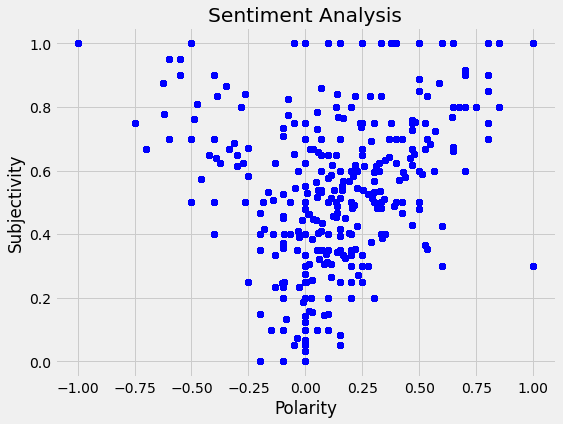

In [49]:
# Plot the subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'], df['Subjectivity'], color='b')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [50]:
#Percentages of polarities
#positive
ptweets = df[df.Analysis == 'Positive']
print(f'Percentage of positive tweets: {(len(ptweets)/len(df))*100}')
#negative
ntweets = df[df.Analysis == 'Negative']
print(f'Percentage of negative tweets: {(len(ntweets)/len(df))*100}')
#neutral
netweets = df[df.Analysis == 'Neutral']
print(f'Percentage of neutral tweets: {(len(netweets)/len(df))*100}')

Percentage of positive tweets: 51.6
Percentage of negative tweets: 19.8
Percentage of neutral tweets: 28.599999999999998


In [51]:
#counting total number of positive,negative or neutral data
tb_counts = df['Analysis'].value_counts()
tb_counts

Positive    258
Neutral     143
Negative     99
Name: Analysis, dtype: int64

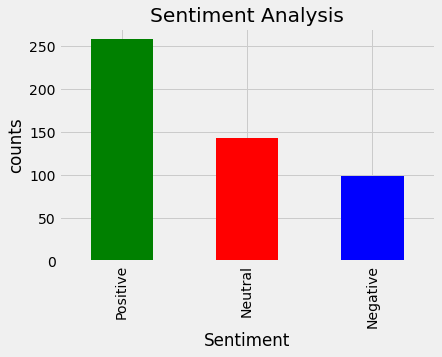

In [52]:
#Graph
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('counts')
my_colors = list(islice(cycle(['g', 'r', 'b', 'y', 'k']), None, len(df)))
df['Analysis'].value_counts().plot(kind='bar', stacked=True,color=my_colors )
plt.show()


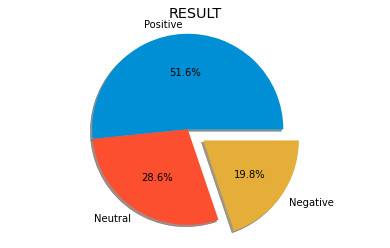

In [53]:
#plotting a pie-chart showing percentage of positive,negative or neutral data 
%matplotlib inline
explode=(0,0,0.2)
plt.pie(tb_counts.values, labels=tb_counts.index,explode=explode,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('RESULT')
plt.show()

In [54]:
df.to_csv("NidhiProject.csv")